In [244]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

listings = pd.read_csv("https://storage.googleapis.com/public-data-337819/listings%202%20reduced.csv",low_memory=False)
reviews = pd.read_csv("https://storage.googleapis.com/public-data-337819/reviews%202%20reduced.csv",low_memory=False)

# Welcome to our analysis of the Airbnb Dataset!
This dataset contains 87,946 rows of booking data from the platform. Our main goal is to explore the data and find answers to these questions: <br>

**Neighborhood Differences:** We want to find out which neighborhoods have the biggest differences in average prices between superhosts and non-superhosts. This will help us understand how host status affects prices in different areas.<br>
**Review Score Impact:** We're interested in knowing which review scores are most closely related to listing prices. Understanding this relationship can give us insights into what aspects of guest experiences matter most to pricing.
<br>
**Host Types:** We also want to compare the average prices set by professional hosts and non-professional hosts. We define professional hosts as those who manage listings in more than five different locations. This comparison will help us see how pricing strategies vary between different types of hosts.
<br><br>
By analyzing this data, we hope to uncover trends and insights that can be useful for both hosts and guests on the Airbnb platform.

In [245]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87946 non-null  int64  
 1   host_id                         87946 non-null  int64  
 2   host_since                      87941 non-null  object 
 3   host_listings_count             87941 non-null  float64
 4   host_identity_verified          87941 non-null  object 
 5   calculated_host_listings_count  87946 non-null  int64  
 6   property_type                   87946 non-null  object 
 7   room_type                       87946 non-null  object 
 8   instant_bookable                87946 non-null  object 
 9   minimum_nights                  87946 non-null  int64  
 10  maximum_nights                  87946 non-null  int64  
 11  number_of_reviews               87946 non-null  int64  
 12  reviews_per_month               

In [246]:
print(listings.head().to_markdown())

|    |    id |   host_id | host_since   |   host_listings_count | host_identity_verified   |   calculated_host_listings_count | property_type               | room_type       | instant_bookable   |   minimum_nights |   maximum_nights |   number_of_reviews |   reviews_per_month | price   |   bedrooms |   beds | host_is_superhost   | neighbourhood_cleansed   |   review_scores_rating |   review_scores_accuracy |   review_scores_cleanliness |   review_scores_checkin |   review_scores_communication |   review_scores_location |   review_scores_value | description                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [247]:
listings.describe()

,id,host_id,host_listings_count,calculated_host_listings_count,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8.794600e+04,8.794600e+04,87941.000000,87946.000000,87946.000000,8.794600e+04,87946.000000,65788.000000,55172.000000,86812.000000,65788.000000,64853.000000,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000
mean,3.586523e+17,1.589904e+08,48.666629,18.140950,5.618050,6.712553e+03,17.977236,1.014903,1.785253,1.803771,4.596540,4.712780,4.623333,4.777310,4.798890,4.720487,4.593404
std,4.121119e+17,1.694033e+08,293.465172,63.745275,23.571976,1.770410e+06,42.834975,1.365452,1.109277,1.276012,0.750778,0.500756,0.551075,0.457757,0.451838,0.421893,0.536391
min,1.391300e+04,4.775000e+03,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.215818e+07,2.186737e+07,1.000000,1.000000,1.000000,5.500000e+01,0.000000,0.150000,1.000000,1.000000,4.500000,4.650000,4.500000,4.750000,4.790000,4.630000,4.490000
50%,4.935854e+07,8.140696e+07,2.000000,2.000000,2.000000,3.650000e+02,4.000000,0.540000,2.000000,1.000000,4.820000,4.880000,4.800000,4.940000,4.970000,4.840000,4.740000
75%,8.164776e+17,2.668211e+08,7.000000,6.000000,4.000000,1.125000e+03,16.000000,1.320000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000
max,9.738958e+17,5.355140e+08,3023.000000,595.000000,1125.000000,5.248556e+08,1536.000000,50.250000,50.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [248]:
reviews.describe()

,listing_id,id,reviewer_id
count,7.224200e+05,7.224200e+05,7.224200e+05
mean,2.672364e+17,7.935290e+17,2.087836e+08
std,3.570106e+17,1.213276e+17,1.703345e+08
min,1.391300e+04,5.308598e+17,4.400000e+01
25%,2.441596e+07,6.890078e+17,5.361243e+07
50%,4.748879e+07,8.056802e+17,1.609683e+08
75%,6.591879e+17,9.049049e+17,3.721240e+08
max,9.723611e+17,9.745963e+17,5.355267e+08


## 1- What is the neighborhood in which superhosts have the biggest average price difference with respect to non superhosts?

In [249]:
# Lets use the sqldf to analyze the dataset!
# This powerfull library allow us to use SQL on Pandas DataFrames.

# Replacing $ and , from the price column
listings["price"] = listings["price"].str.replace("$", "").str.replace(",","").astype("float64")

# Querying the dataset using CTEs to compare the average of super and not super hosts!
query = """
WITH f AS (
SELECT neighbourhood_cleansed, host_is_superhost, AVG(price) AS average_price_not_super
from listings
WHERE host_is_superhost IS NOT NULL AND host_is_superhost = 'f'
GROUP BY neighbourhood_cleansed, host_is_superhost),
t AS (
SELECT neighbourhood_cleansed, host_is_superhost, AVG(price) AS average_price_super
from listings
WHERE host_is_superhost IS NOT NULL AND host_is_superhost = 't'
GROUP BY neighbourhood_cleansed, host_is_superhost)

SELECT t.*, f.average_price_not_super, (t.average_price_super - f.average_price_not_super) AS diff
FROM t
JOIN f
ON t.neighbourhood_cleansed = f.neighbourhood_cleansed
ORDER BY diff ASC """
result = sqldf(query, locals())
print("The neighbourhood that presented the highest average difference between super and not super hosts is Barking and Dagenham!")
result

The neighbourhood that presented the highest average difference between super and not super hosts is Barking and Dagenham!


,neighbourhood_cleansed,host_is_superhost,average_price_super,average_price_not_super,diff
0,Barking and Dagenham,t,102.025000,269.611570,-167.586570
1,Hounslow,t,101.967213,196.331455,-94.364242
2,Brent,t,122.572447,189.245873,-66.673427
3,Merton,t,107.415094,160.172191,-52.757096
4,Havering,t,77.657143,126.947531,-49.290388
5,City of London,t,200.655738,249.047210,-48.391473
6,Newham,t,118.423948,156.719758,-38.295810
7,Southwark,t,148.845000,186.582794,-37.737794
8,Barnet,t,128.632312,166.095596,-37.463284
9,Bexley,t,65.882353,100.077830,-34.195477


<ipython-input-250-dab1be5e7734>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data.dropna(inplace = True)


<Axes: >

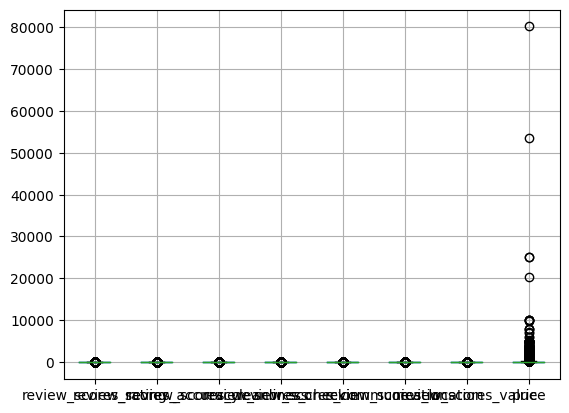

In [250]:
#Filtering the dataset
filter_data = listings[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','price']]
filter_data.dropna(inplace = True)
filter_data.boxplot()

<ipython-input-251-27cf408ffb98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data.query('price < 400', inplace=True)


<Axes: >

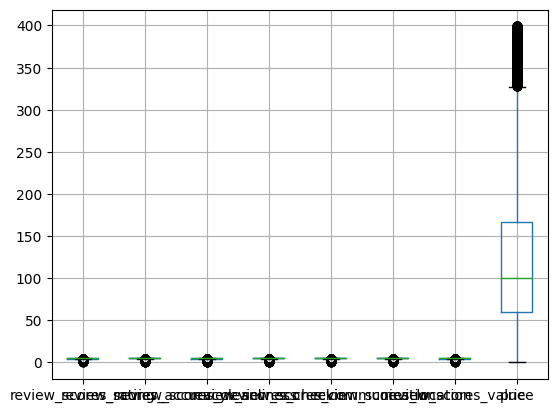

In [251]:
#Removing outliers from the dataset.

filter_data.query('price < 400', inplace=True)
filter_data.boxplot()

## 2 -Which of the review scores has the highest correlation to price?

All the correlations between prices and scores are extremaly weak! But the scores by location has the "biggest" correlation with prices!


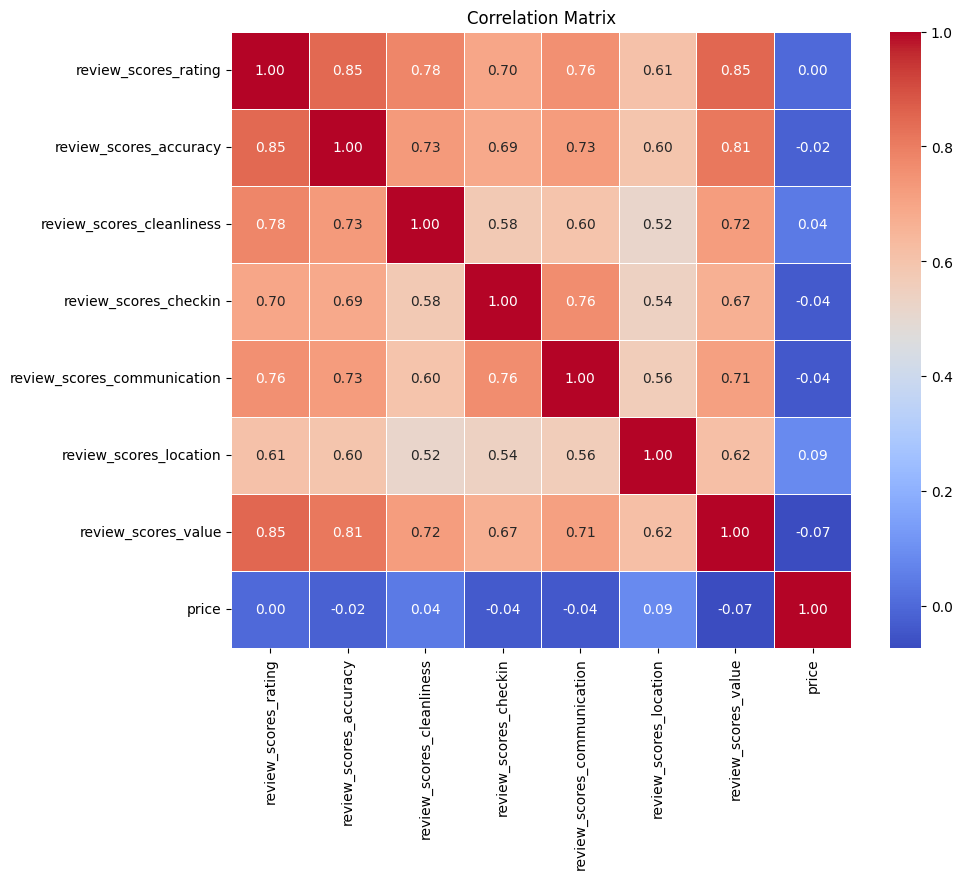

In [252]:
print("""All the correlations between prices and scores are extremaly weak! But the scores by location has the "biggest" correlation with prices!""")
plt.figure(figsize=(10, 8))
sns.heatmap(filter_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 3 -What is the average price difference between a professional host and a non-professional one? Consider a host as professional if they have listings in more than 5 different locations.

In [253]:
#Querying the listing dataset to filter only the professional hosters!
query1 = """
WITH f AS (
SELECT host_id
FROM listings
GROUP BY host_id
HAVING COUNT(DISTINCT neighbourhood_cleansed) > 5)

SELECT ROUND(AVG(price),2) as non_prof
FROM listings
WHERE host_id NOT IN (SELECT host_id FROM f);
"""

#Querying the listing dataset to filter only the non professional hosters!
query2 = """
WITH f AS (
SELECT host_id
FROM listings
GROUP BY host_id
HAVING COUNT(DISTINCT neighbourhood_cleansed) > 5)

SELECT ROUND(AVG(price),2) as prof_avg
FROM listings
WHERE host_id IN (SELECT host_id FROM f);
"""

result1 = sqldf(query1, locals())
result2 = sqldf(query2, locals())
print(f"The professional hosts have, on average, ${result2['prof_avg'][0] - result1['non_prof'][0]:.2f} highest prices in comparison with non-professional hosts.")

The professional hosts have, on average, $285.70 highest prices in comparison with non-professional hosts.
